1.利用鸢尾花数据集构建一个KNN分类器，能够对给定的鸢尾花样本进行分类和预测。

In [19]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 加载鸢尾花数据集
iris = load_iris()

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=42)

# 创建KNN分类器
knn = KNeighborsClassifier(n_neighbors=3)

# 训练模型
knn.fit(X_train, y_train)

# 对测试集进行预测
y_pred = knn.predict(X_test)
#评估结果
knn.score(X_test,y_test)

0.9833333333333333

2.利用SVM构建一个能对手写数字进行识别的分类器。（可以采用sklean中提供的手写字数据集）

In [27]:
import numpy as np
from sklearn import svm
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import _pickle as pickle

mnist=load_digits()
x=mnist.data
y=mnist.target
x,test_x,y,test_y=train_test_split(x,y,test_size=0.2,random_state=40)
cf1=svm.SVC(gamma=0.001,C=100)
cf1.fit(x,y)
print(cf1.predict(test_x))
print("评估结果：%f" % cf1.score(test_x,test_y))#评估
cf1.support_vectors_#支持向量
cf1.support_#支持向量索引
cf1.n_support_#每个类的支持向量的数量

[8 1 9 0 3 3 2 7 3 9 0 4 0 6 7 6 7 3 5 0 1 8 5 2 0 6 4 1 7 5 5 8 4 2 6 4 8
 9 7 5 5 9 8 4 2 2 3 5 0 0 1 9 1 9 1 2 6 4 5 1 8 4 8 0 7 6 3 9 4 4 3 2 7 4
 7 6 2 9 5 4 1 8 9 1 2 4 3 4 3 1 2 5 0 0 7 1 1 6 7 0 8 2 5 1 1 5 2 1 2 1 4
 4 4 8 9 6 6 3 6 4 1 8 8 3 7 6 2 1 1 2 9 8 4 9 9 3 7 7 6 9 1 6 2 4 5 8 0 5
 4 4 3 2 7 9 7 6 2 2 9 7 2 6 6 5 2 1 8 1 7 4 3 8 9 4 1 7 6 1 1 0 4 4 8 1 4
 0 0 7 3 0 7 9 0 1 0 3 0 9 6 8 6 8 1 0 1 8 3 4 7 8 9 9 8 8 4 1 6 5 5 1 1 3
 9 6 2 3 6 2 6 6 8 4 1 8 9 8 6 3 2 5 1 3 2 0 1 0 1 1 9 6 6 9 9 4 3 6 0 9 1
 9 4 7 7 8 1 3 7 6 9 4 2 7 7 8 5 7 7 1 5 3 3 5 9 8 5 4 9 0 4 8 7 3 7 6 8 6
 8 2 2 0 8 7 3 8 4 1 2 7 6 4 1 1 2 0 8 1 1 9 2 3 9 4 6 0 0 1 3 3 5 9 7 2 2
 8 5 9 2 2 0 3 3 7 3 9 9 2 5 5 4 1 3 0 9 7 5 2 9 5 2 1]
评估结果：0.994444


array([40, 82, 62, 69, 70, 71, 50, 74, 90, 86])

3.根据航空公司目前积累的大量客户会员信息及其乘坐的航班记录,可以得到包括姓名、乘机的间隔、乘机次数、消费金额等十几条属性信息。
结合具体情景,最终选取客户消费时间间隔、消费频率、消费金额这三个指标作为航空公司识别客户价值的指标（常被称作RFM模型）。现给定处理后的数据集i_nuc.xls，完成下列要求：

(1)对数据集进行预处理（比如规范化），得到数据集Data；

(2)利用已预处理的数据(Data)，基于RFM模型，使用K-Means算法对其进行聚类分析；

(3)统计各类别的数目；给出聚类中心；详细输出每个样本对应的类别；画出每个类别的概率密度图。

# 方法一：

In [8]:
%matplotlib inline
import pandas as pd
#读取数据
data=pd.read_excel(r'i_nuc.xls',index_col='Id',sheet_name='Sheet2')

#规范化
data_zs=1.0*(data-data.mean())/data.std()

#聚类分析
from sklearn.cluster import KMeans
k=3
iteration=500
#创建模型
model=KMeans(n_clusters=k,max_iter=iteration)
#训练模型
model.fit(data_zs)
#统计个数，必须转换为Series，才能使用value_counts
r1 =pd.Series(model.labels_).value_counts()
r1

1    518
2    342
0     40
dtype: int64

In [9]:
#聚类中心
r2 = pd.DataFrame(model.cluster_centers_)
r2

,0,1,2
0,3.405640,-0.295148,0.487604
1,-0.173762,-0.678863,-0.303503
2,-0.135249,1.057663,0.400603


In [10]:
r = pd.concat([r2,r1],axis = 1)
r

,0,1,2,0
0,3.405640,-0.295148,0.487604,40
1,-0.173762,-0.678863,-0.303503,518
2,-0.135249,1.057663,0.400603,342


In [11]:
#每个样本对应的类别
r = pd.concat([data, pd.Series(model.labels_, index=data.index)], axis=1)  
r.columns = list(data.columns) + [u'聚类类别']    #重命名表头
print(r)

          R   F        M  聚类类别
Id                            
inuc001  21  17  1256.47     2
inuc002   1  19  1728.84     2
inuc003   8   4   617.83     1
inuc004  10   9  1380.94     1
inuc005   4   3  1783.68     1
...      ..  ..      ...   ...
inuc896   1  20  1951.03     2
inuc897   0   4  1331.32     1
inuc898  13  27   719.12     2
inuc899  16   6   735.31     1
inuc900  56   4  1869.92     0

[900 rows x 4 columns]


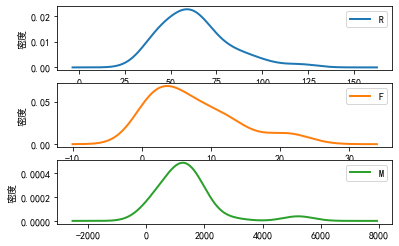

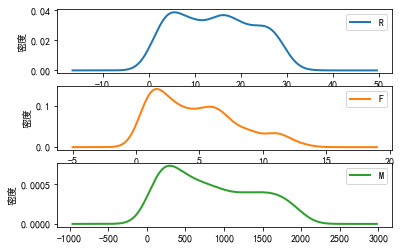

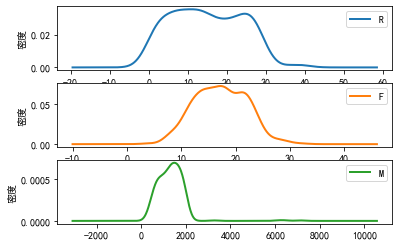

In [12]:
#绘制每个类别的概率密度图
def density_plot(data):
    import matplotlib.pyplot as plt
    plt.rcParams ['font.sans-serif'] = ['SimHei']
    plt.rcParams ['axes.unicode_minus']= False
    p = data.plot(kind='kde',linewidth = 2,subplots = True,sharex = False)
    [p[i].set_ylabel(u"密度") for i in range(k)]
    plt.legend()
    return plt
pic_output=r'd:\\'
for i in range(k):
    density_plot(data[r[u'聚类类别']==i]).savefig(u'%s%s.png'%(pic_output,i))

# 方法二：

In [28]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 读取数据
data = pd.read_excel('i_nuc.xls')

# 数据预处理，标准化
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['R', 'F', 'M']])

In [29]:
# 使用KMeans进行聚类
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

KMeans(n_clusters=3, random_state=42)

0    520
2    340
1     40
dtype: int64
[[-0.16993154 -0.67366012 -0.30317767]
 [ 3.40753319 -0.29531165  0.48787553]
 [-0.14099096  1.06504626  0.40628637]]
          Id   R   F        M  类别
0    inuc001  21  17  1256.47   2
1    inuc002   1  19  1728.84   2
2    inuc003   8   4   617.83   0
3    inuc004  10   9  1380.94   0
4    inuc005   4   3  1783.68   0
..       ...  ..  ..      ...  ..
895  inuc896   1  20  1951.03   2
896  inuc897   0   4  1331.32   0
897  inuc898  13  27   719.12   2
898  inuc899  16   6   735.31   0
899  inuc900  56   4  1869.92   1

[900 rows x 5 columns]


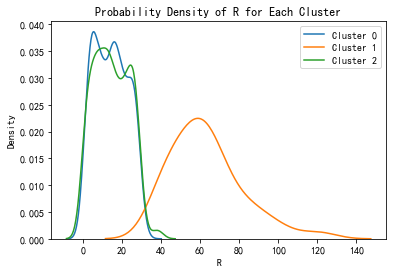

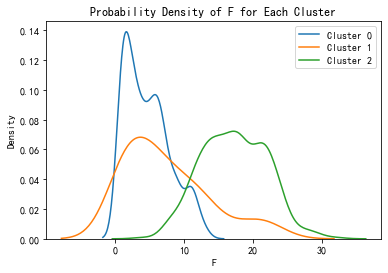

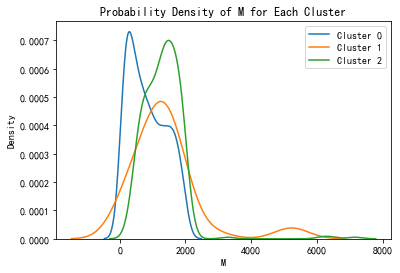

In [30]:
# 输出各类别的数量
print(pd.Series(kmeans.labels_).value_counts())

# 输出聚类中心
print(kmeans.cluster_centers_)

# 输出每个样本的类别
data['类别'] = kmeans.labels_
print(data)
# 画出每个特征的概率密度图
for feature in ['R', 'F', 'M']:
    plt.figure(figsize=(6,4))
    for i in range(3):
        sns.kdeplot(data.loc[data['类别'] == i, feature], label=f'Cluster {i}')
    plt.title(f'Probability Density of {feature} for Each Cluster')
    plt.legend()
    plt.show()